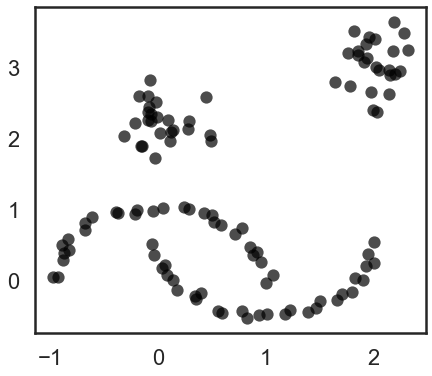

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.7, 's' : 150, 'linewidths':0}

moons, _ = data.make_moons(n_samples=60, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.1,2.25), (2.0, 3.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.figure(figsize = (7,6))
plt.scatter(test_data.T[0], test_data.T[1], color='black', **plot_kwds)


In [11]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
predictions = clusterer.fit_predict(test_data)

<AxesSubplot:ylabel='distance'>

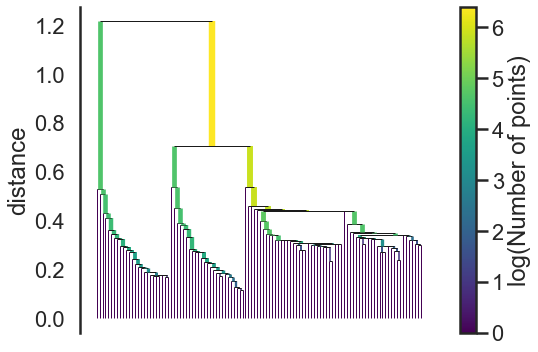

In [12]:
plt.figure(figsize = (8,6))
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

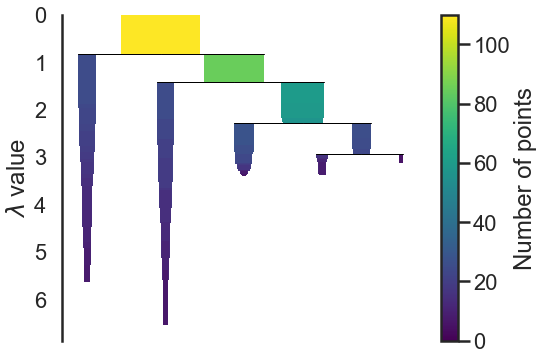

In [13]:
plt.figure(figsize = (8,6))
clusterer.condensed_tree_.plot()

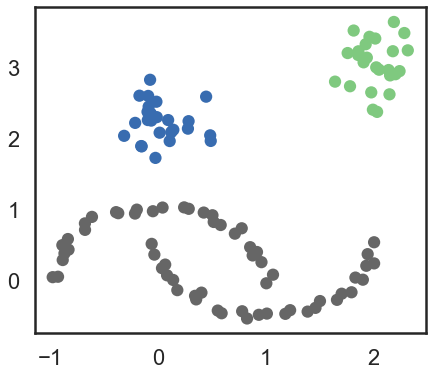

In [14]:
plt.figure(figsize = (7,6))
plot_kwds2 = {'alpha' : 1, 's' : 150, 'linewidths':0}
plt.scatter(test_data.T[0], test_data.T[1], c=predictions, **plot_kwds2, cmap='Accent')

In [26]:
from sklearn.cluster import KMeans

km_clusterer = KMeans(n_clusters=3,random_state=42, max_iter=10000, init='k-means++')

predictions_km = km_clusterer.fit_predict(test_data)

Text(0.5, 1.0, 'Centroid-Based Clustering')

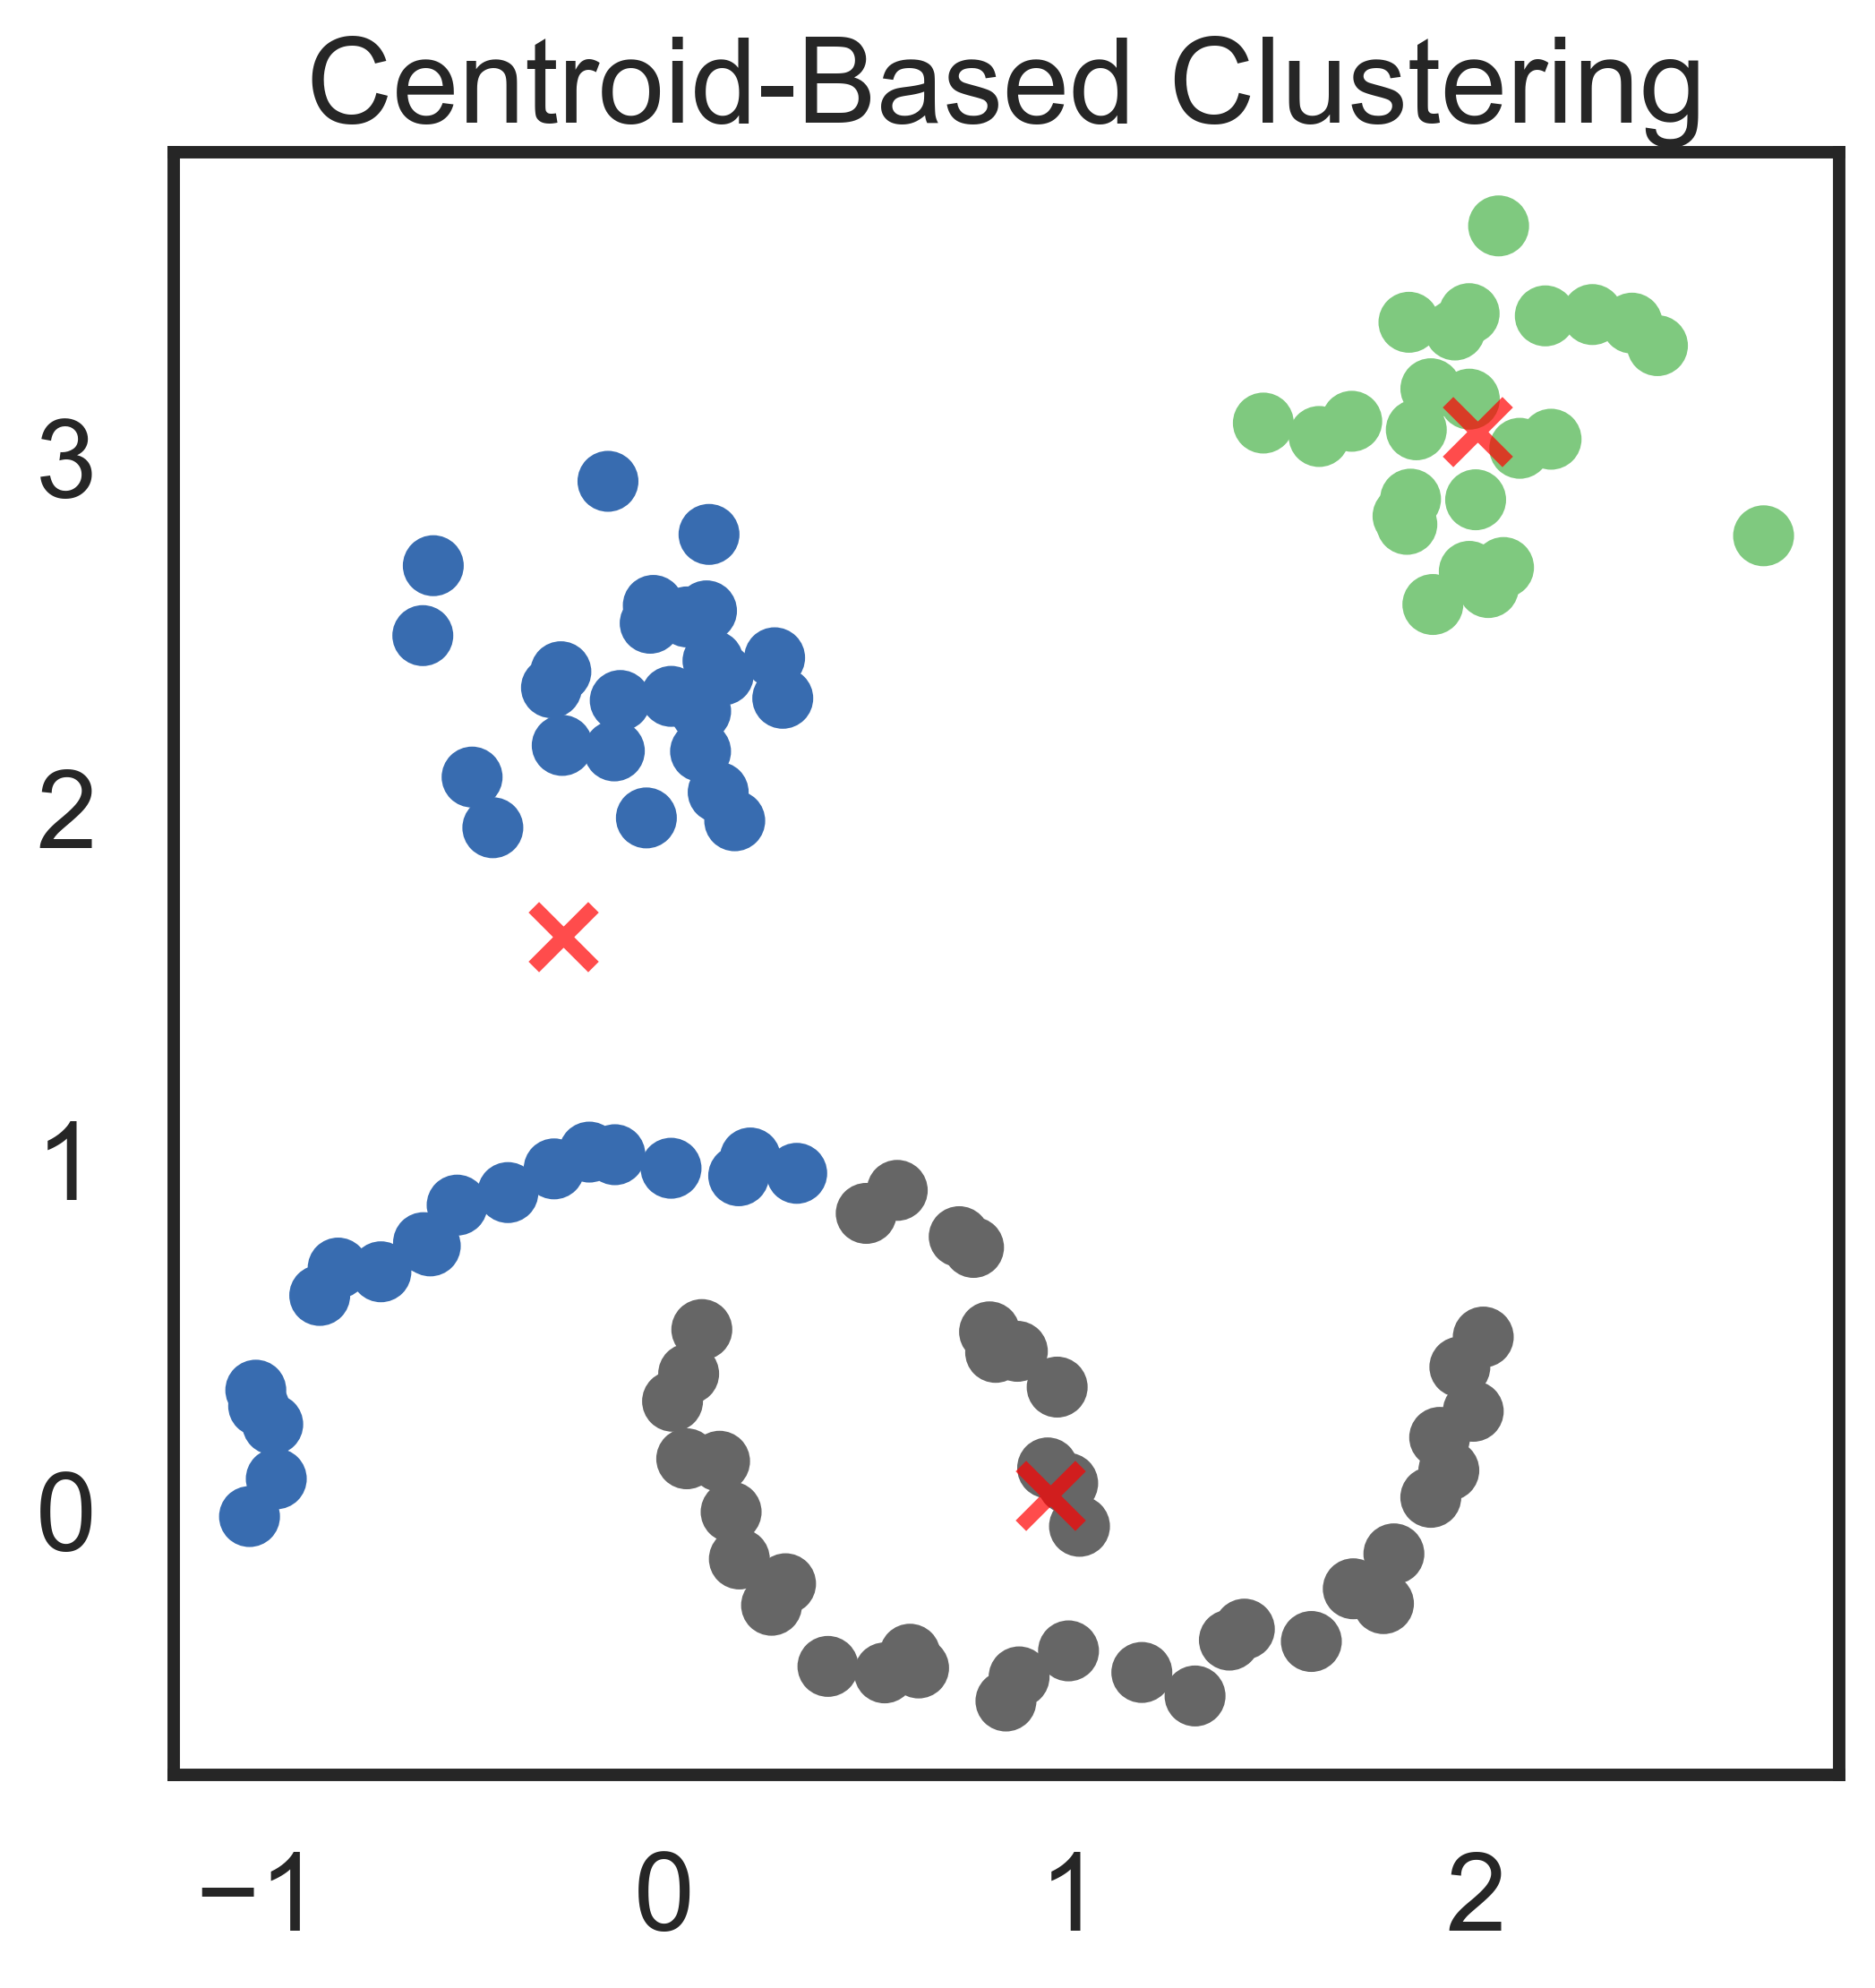

In [36]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

centroids = km_clusterer.cluster_centers_


plt.figure(figsize = (6,6))
plot_kwds2 = {'alpha' : 1, 's' : 150, 'linewidths':0}
plt.scatter(test_data.T[0], test_data.T[1], c=predictions_km, **plot_kwds2, cmap='Accent')
plt.scatter(centroids.T[0],centroids.T[1],c='red',marker='x', alpha =0.7)
plt.title('Centroid-Based Clustering')

In [30]:
centroids

array([[ 2.00360262,  3.07390344],
       [-0.24707742,  1.63627903],
       [ 0.9523    ,  0.0457396 ]])

Text(0.5, 1.0, 'Density-Based Clustering')

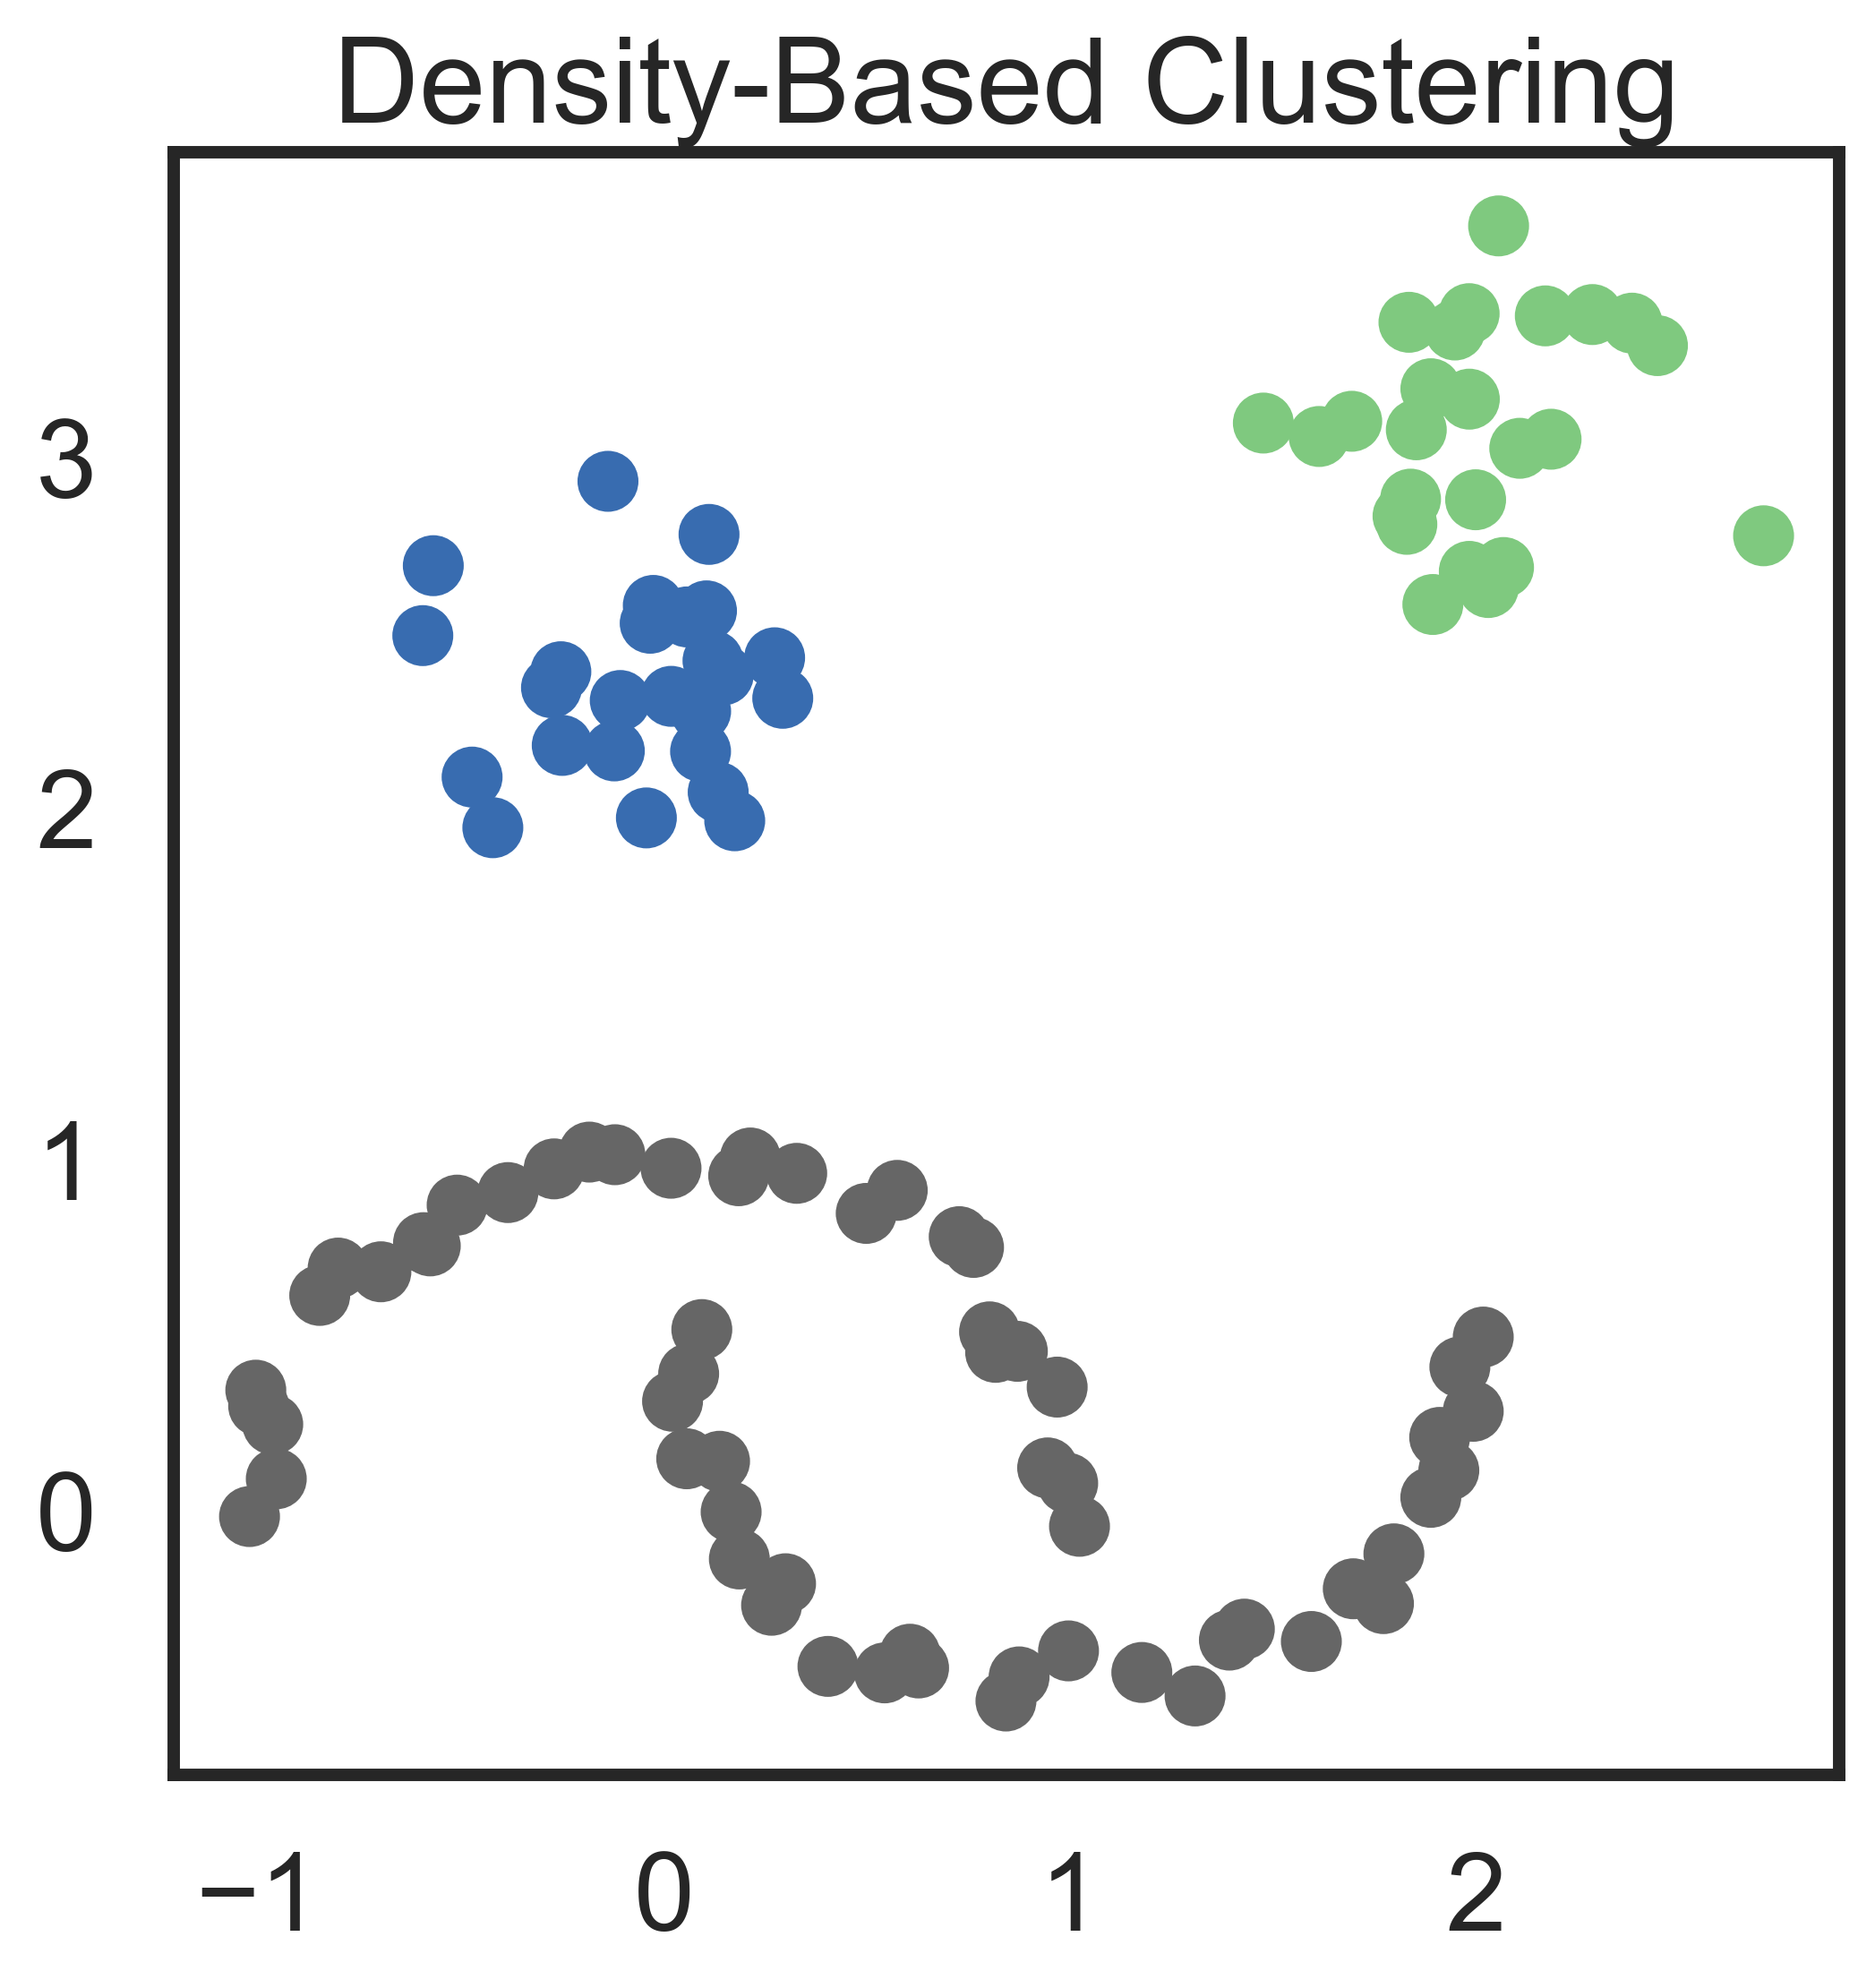

In [35]:
plt.figure(figsize = (6,6))
plot_kwds2 = {'alpha' : 1, 's' : 150, 'linewidths':0}
plt.scatter(test_data.T[0], test_data.T[1], c=predictions, **plot_kwds2, cmap='Accent')
plt.title('Density-Based Clustering')

In [42]:
test_data_2 =np.append(test_data,[[3.5,1.5]],axis =0)

test_data_2

array([[ 1.02371020e+00, -4.23839615e-02],
       [ 9.35248497e-02,  5.17505735e-01],
       [ 1.96051158e+00,  4.11059644e-01],
       [ 5.63270452e-02,  1.49783964e-01],
       [ 6.11063332e-02,  3.91635548e-01],
       [ 6.27404149e-01, -4.45601169e-01],
       [ 2.65318232e-01, -2.67117110e-01],
       [-1.02045464e+00, -1.46341980e-02],
       [ 1.59473158e+00, -3.70186743e-01],
       [ 1.65711761e-01, -1.55270320e-03],
       [ 8.70702805e-01,  4.55585738e-01],
       [ 1.39287595e+00, -3.66278855e-01],
       [ 9.68720180e-01,  3.53776411e-01],
       [ 9.96673544e-01, -3.96982474e-01],
       [-6.96874081e-01,  6.81969388e-01],
       [ 7.62755660e-01,  7.51266166e-01],
       [-9.63240661e-01,  2.47802837e-01],
       [ 3.27246897e-01,  9.62144760e-01],
       [ 2.99774063e-01, -2.05895475e-01],
       [ 2.01809919e+00,  4.96229107e-01],
       [ 7.27449874e-01,  7.81897873e-01],
       [-1.00495462e+00,  3.45035665e-01],
       [ 2.14526093e-02,  3.13493087e-01],
       [-9.

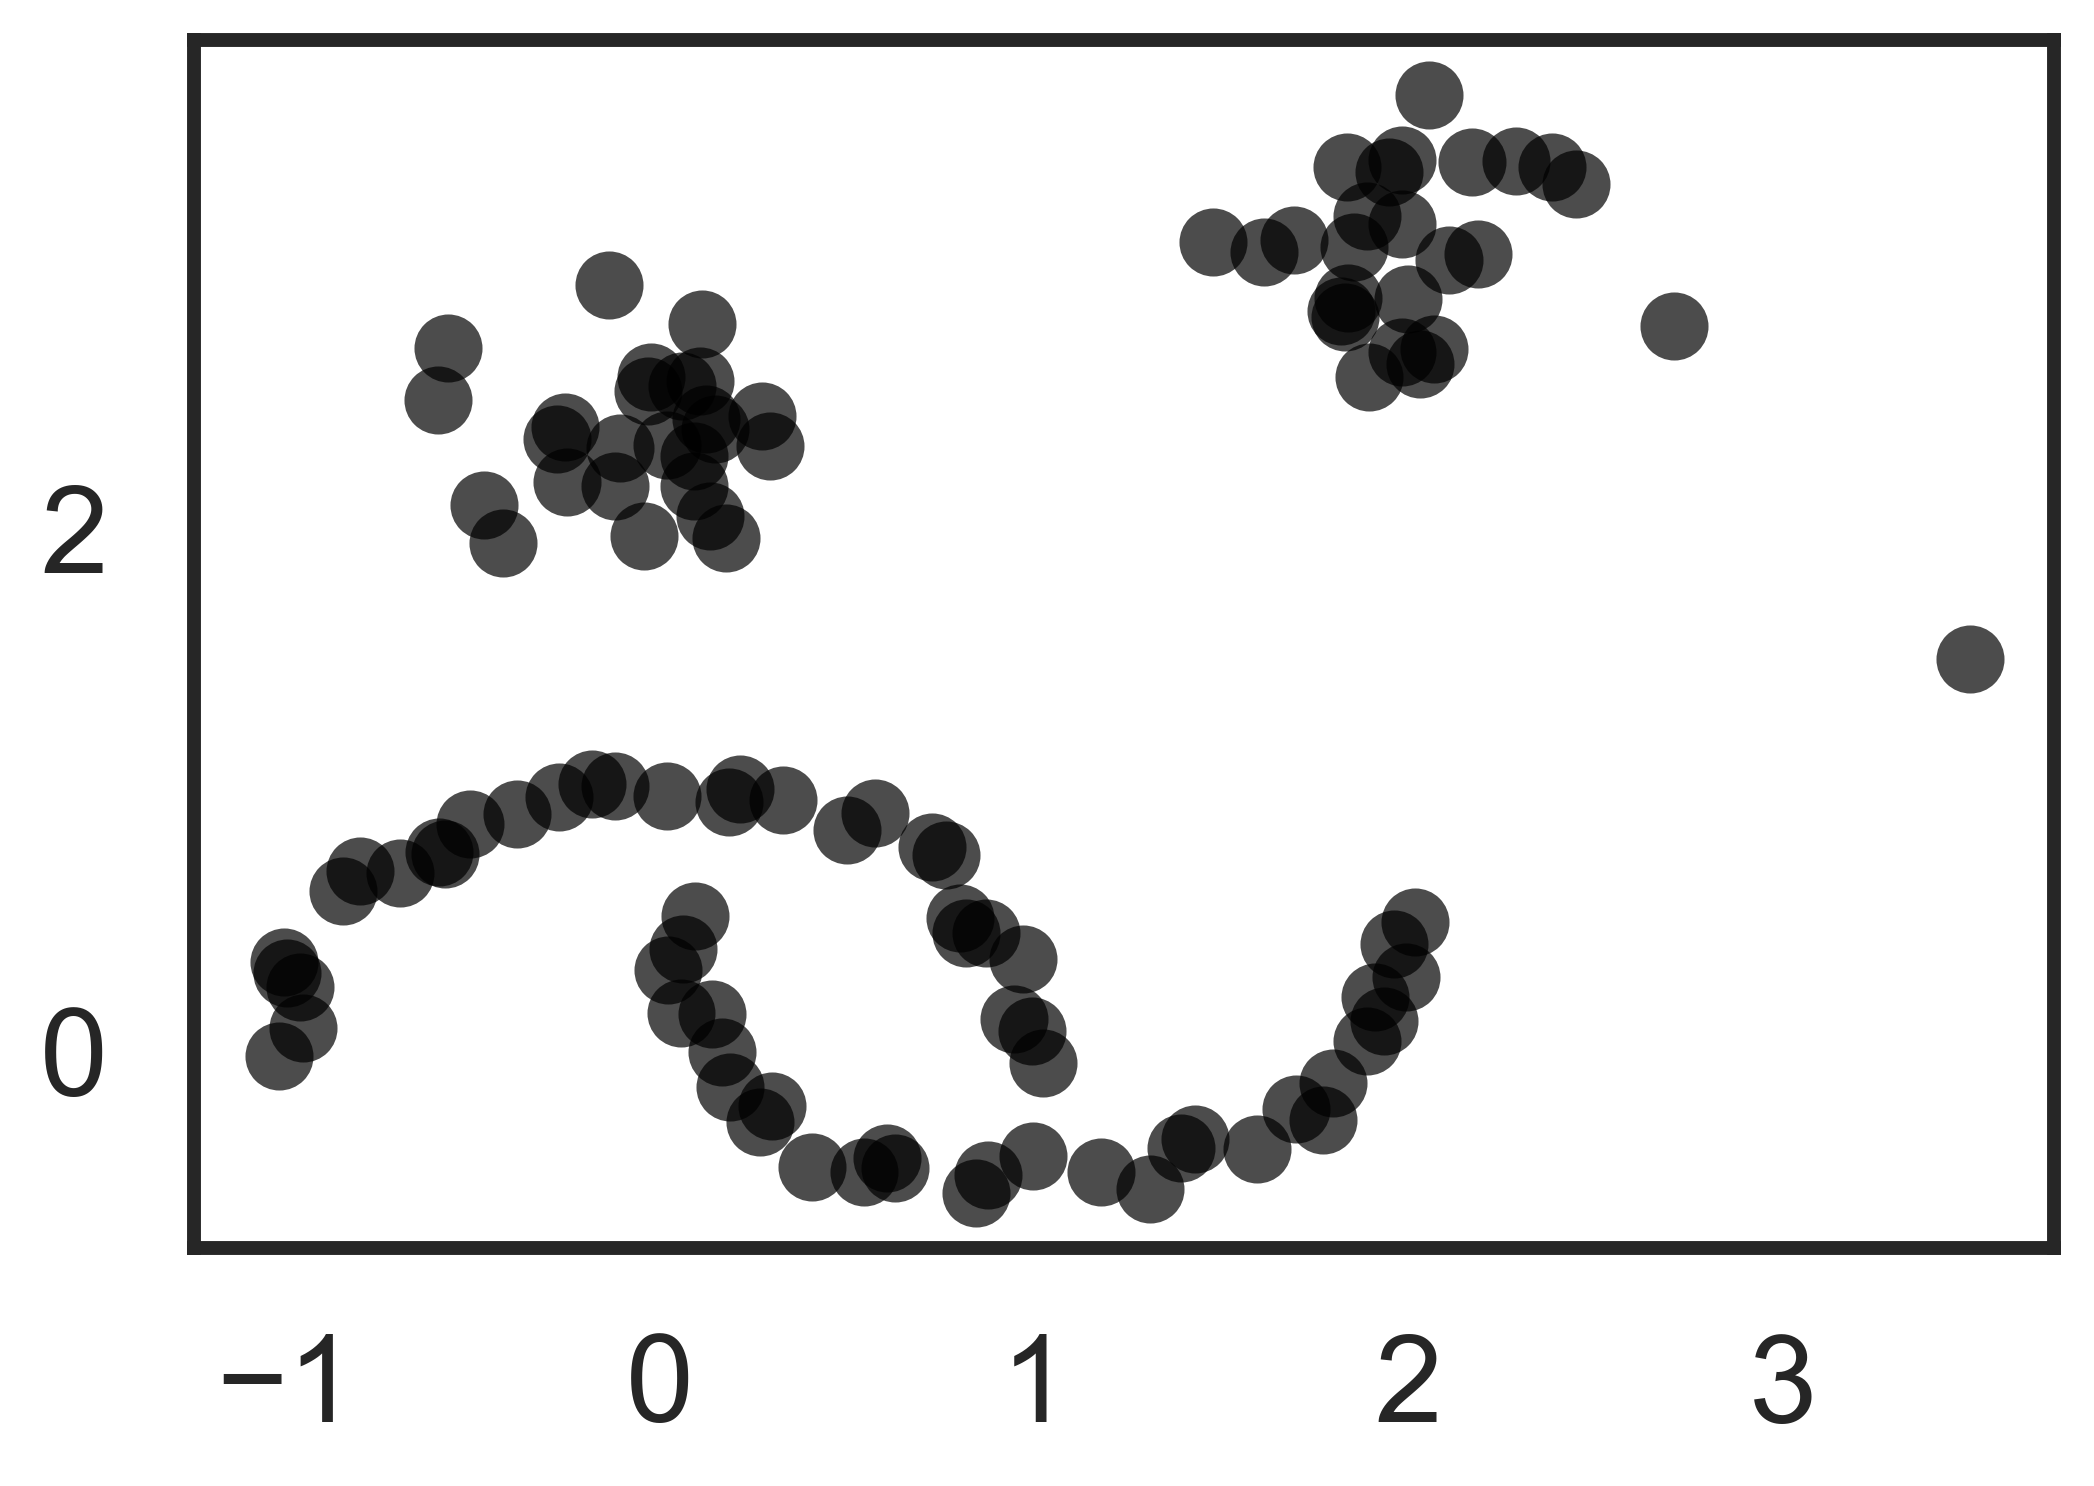

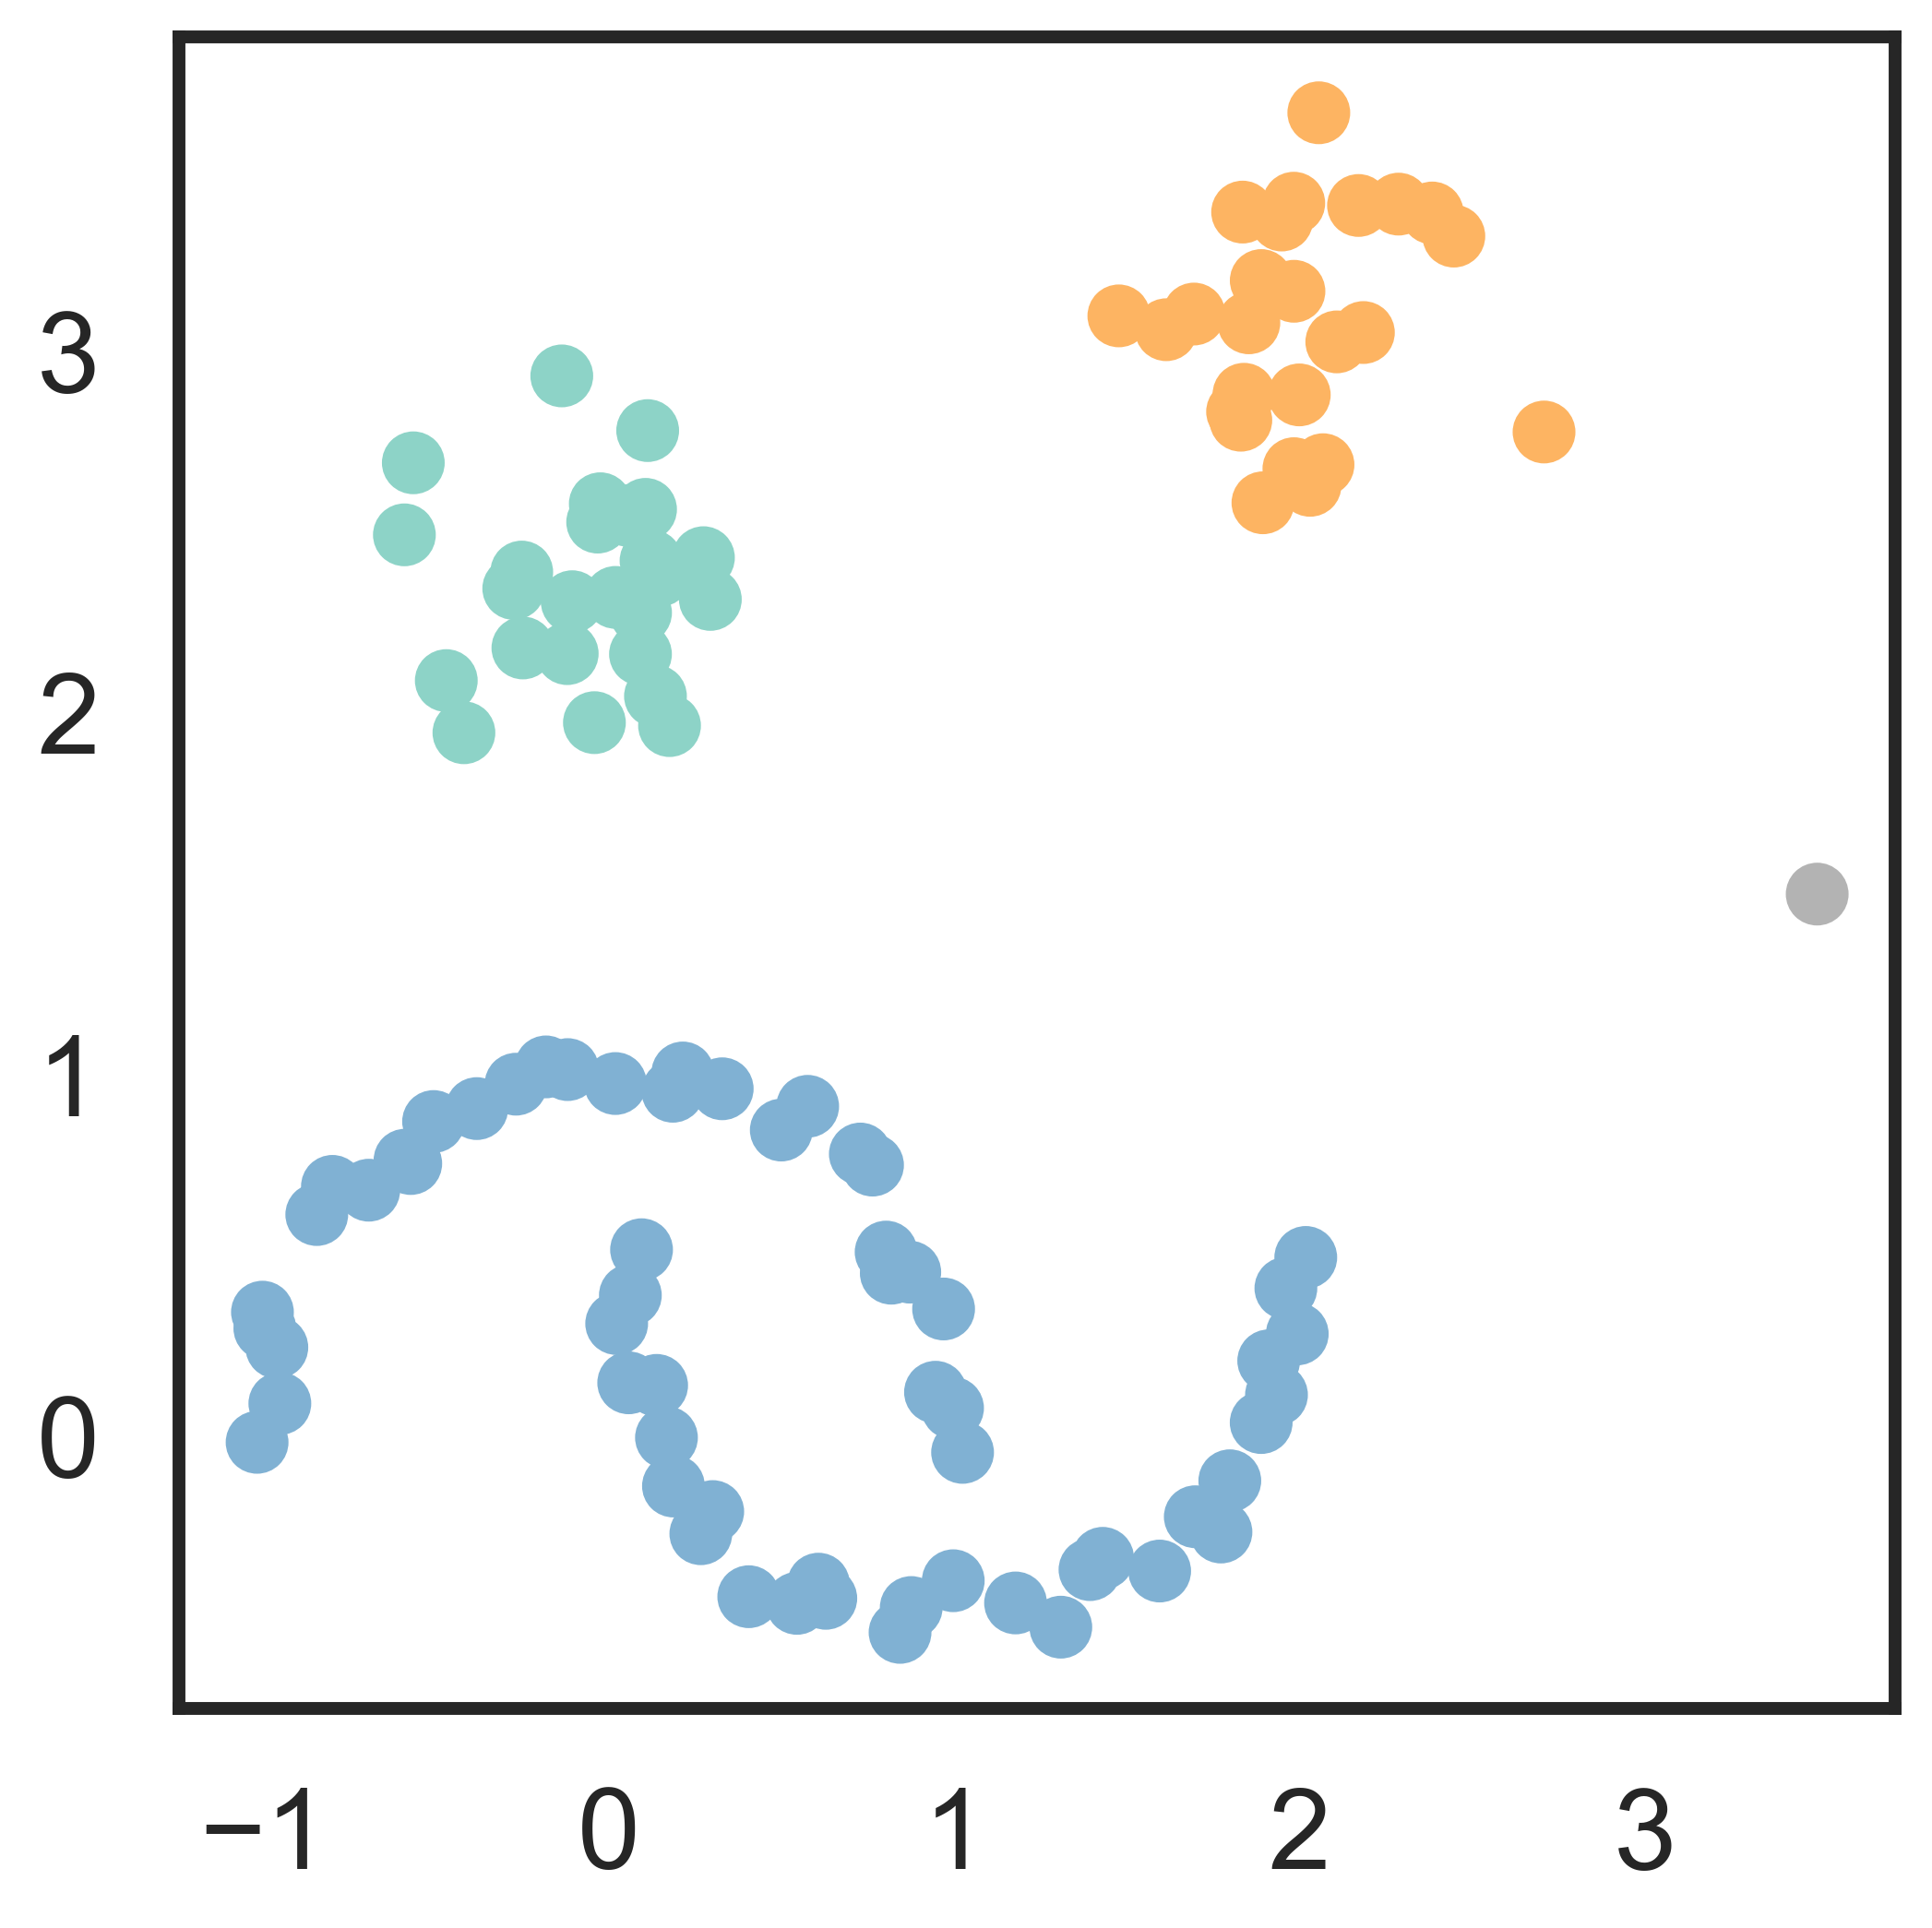

In [78]:
from sklearn.cluster import DBSCAN
import tribolium_clustering as tc
dbs_clusterer = DBSCAN(eps=0.9)
db_pred = dbs_clusterer.fit_predict(test_data_2)

plot_cmap = tc.plot_cmap()

fig,ax = plt.subplots(1,1,figsize = (6,6))

ax.scatter(test_data_2.T[0], test_data_2.T[1], c=[plot_cmap[i] for i in db_pred], **plot_kwds2)

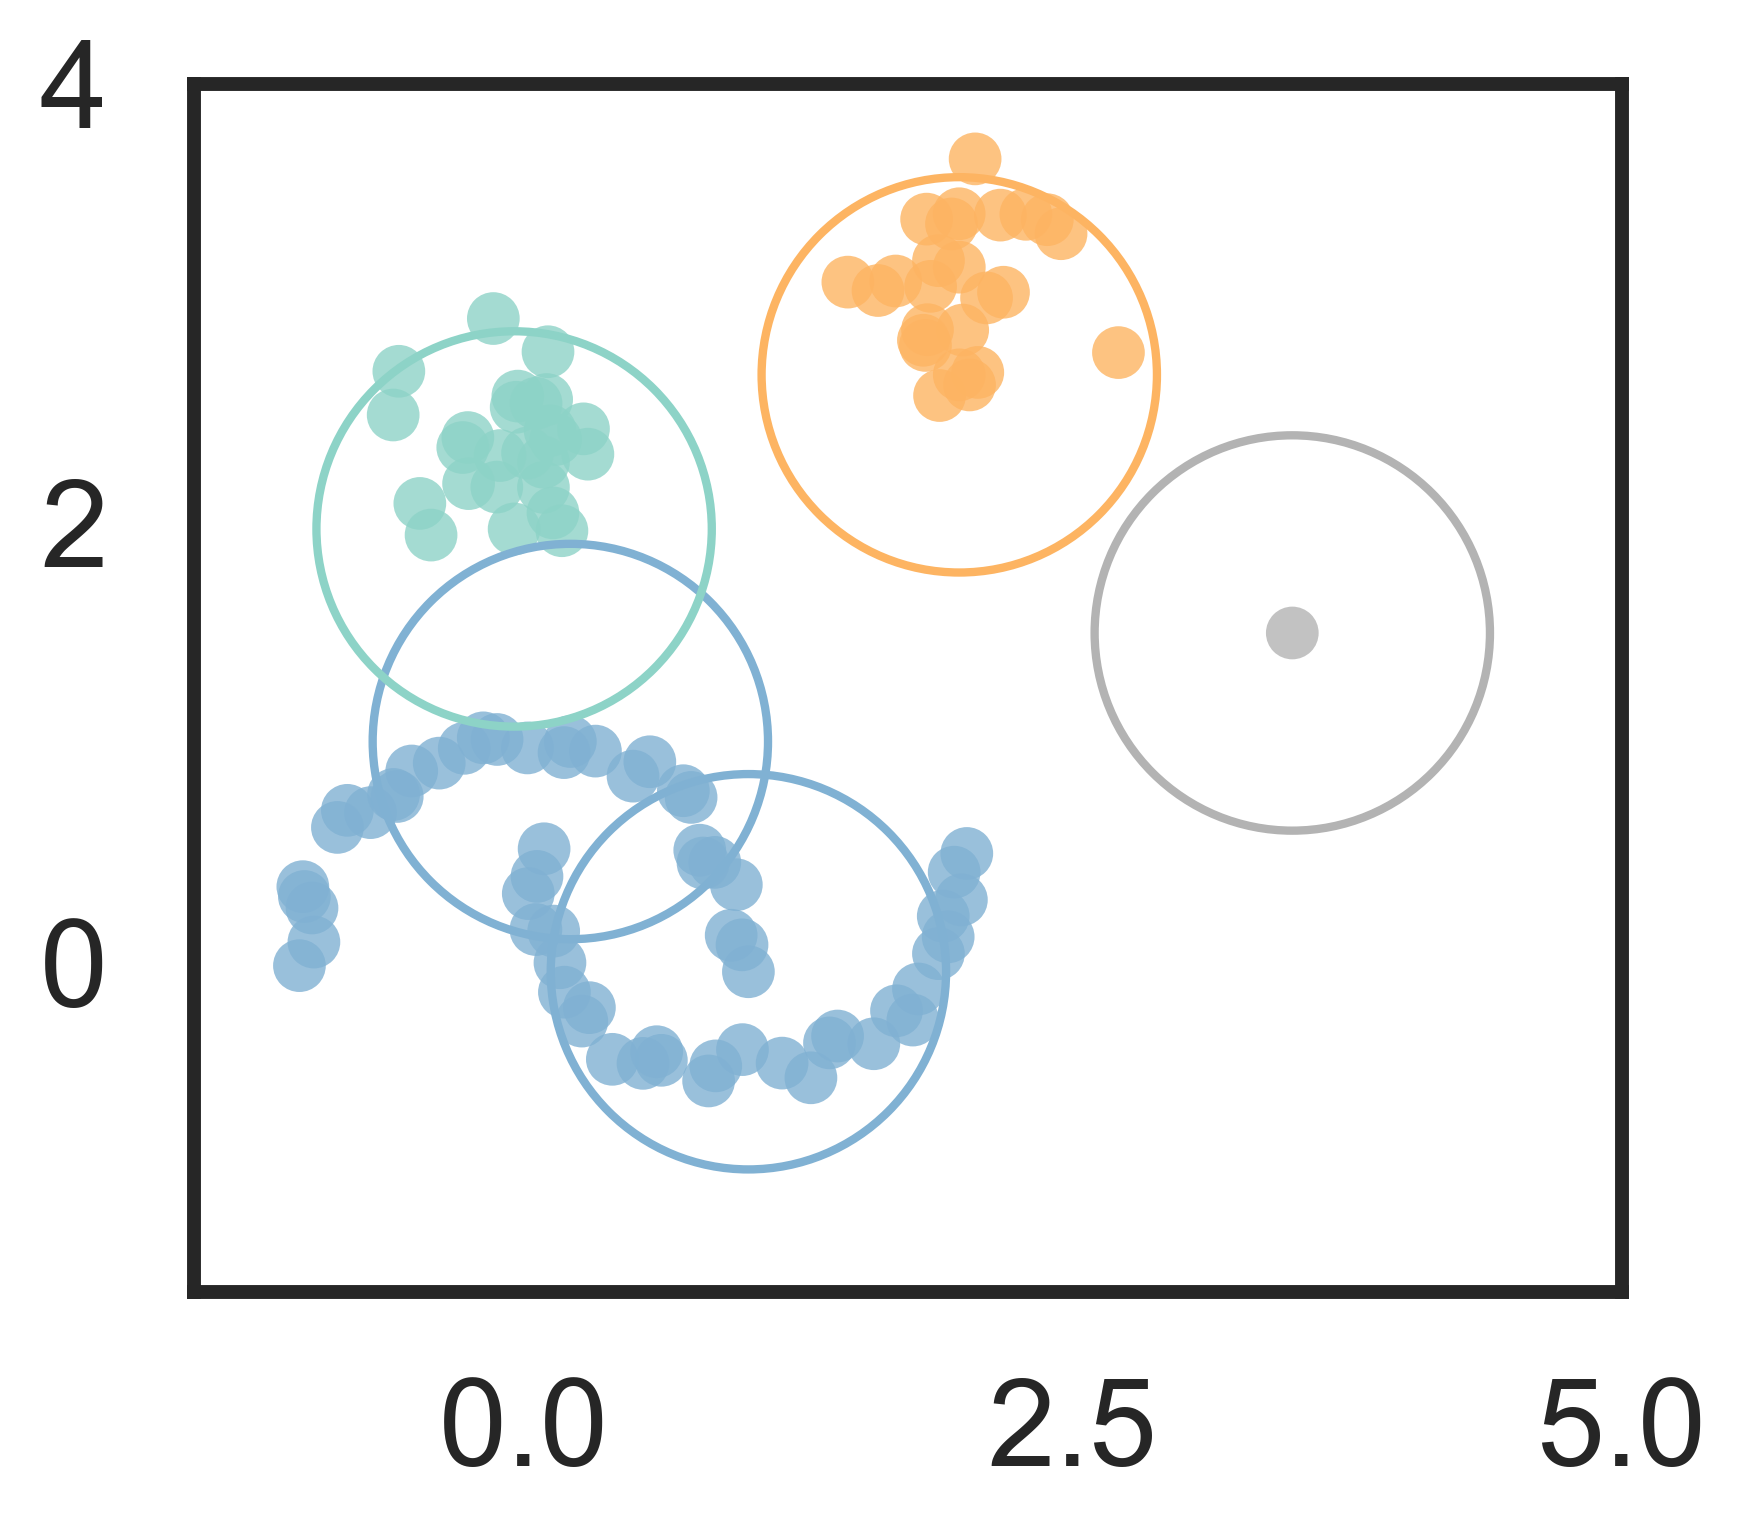

In [124]:
import matplotlib.patches as patch

fig,ax = plt.subplots(1,1)
plot_kwds2 = {'alpha' : 0.8, 's' : 90, 'linewidths':0}
ax.scatter(test_data_2.T[0], test_data_2.T[1], c=[plot_cmap[i] for i in db_pred], **plot_kwds2)

for x, y, pred,index in zip(test_data_2.T[0],test_data_2.T[1],db_pred,range(len(test_data_2))):
    if index in range(0,111,30) or index in [110]:
        draw_circle = patch.Circle((x, y), 0.9,fill=False, linewidth = 1.5,linestyle = '-',color = plot_cmap[pred])
        ax.add_artist(draw_circle)
plt.ylim([-1.5,4])
plt.xlim([-1.5,5])
ax.set_aspect(1)
plt.show()


In [100]:
db_pred[70]

1

In [85]:
db_pred


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  2,  1,  2,  2,  1,  2,  2,  1,  1,  2,  1,  2,  2,  2,  2,  1,
        2,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1,  2,  2,  1,
        1,  1,  2,  1,  1,  1,  2,  1, -1], dtype=int64)

In [101]:
test_data_2.T[0]

IndexError: too many indices for array: array is 1-dimensional, but 7 were indexed